In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#data clean 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
#data split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [31]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [33]:
df.drop(columns='id', inplace=True)

In [6]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

bmi    201
dtype: int64

In [8]:
cleaner = KNNImputer(n_neighbors=11, weights="distance")
numerical = df[null_columns].select_dtypes(exclude = "object").columns
df[numerical] = cleaner.fit_transform(df[numerical])

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
for i in range(0, len(df.columns)):
    print(df[df.columns[i]].value_counts())
    print('************************************************\n')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
************************************************

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
************************************************

0    4612
1     498
Name: hypertension, dtype: int64
************************************************

0    4834
1     276
Name: heart_disease, dtype: int64
************************************************

Yes    3353
No     1757
Name: ever_married, dtype: int64
************************************************

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
************************************************

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
************************************************

93.88     6
91.68     5
91.85  

In [11]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [17]:
'''gen = {'Female':0, 'Male':1}
yes_no = {'No':0, 'Yes':1}
work = {'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}
Residence = {'Urban':0, 'Rural':1}
smoking = {'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3}'''

In [18]:
'''df['gender'] = df['gender'].replace(gen)
df['ever_married'] = df['ever_married'].replace(yes_no)
df['work_type'] = df['work_type'].replace(work)
df['Residence_type'] = df['Residence_type'].replace(Residence)
df['smoking_status'] = df['smoking_status'].replace(smoking)'''

In [12]:
categoricals = []
for col, col_type in df.dtypes.iteritems():
    if col_type == 'O':
        categoricals.append(col)
    else:
        df[col].fillna(0, inplace=True)

In [13]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [14]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
df_ohe = pd.get_dummies(df, columns=categoricals, dummy_na=True)
df_ohe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_nan,ever_married_No,...,work_type_children,work_type_nan,Residence_type_Rural,Residence_type_Urban,Residence_type_nan,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [16]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.894508,7.698235,10.30,23.80,28.40,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


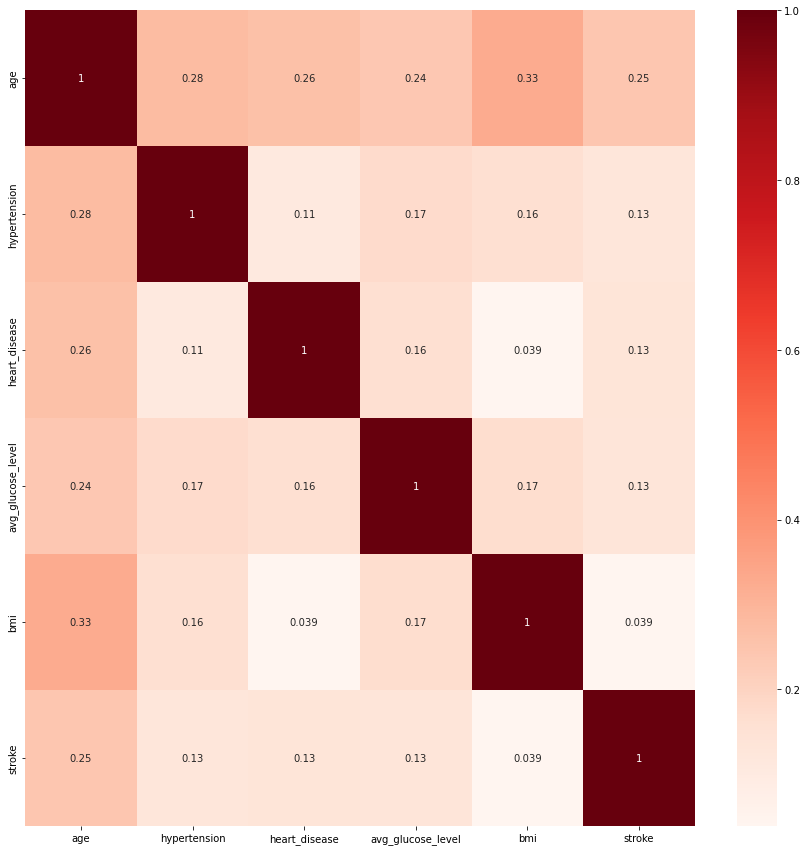

In [18]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
from sklearn.utils import resample
df_majority_0 = df_ohe[(df_ohe['stroke']==0)] 
df_minority_1 = df_ohe[(df_ohe['stroke']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 4860, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<AxesSubplot:xlabel='stroke', ylabel='count'>

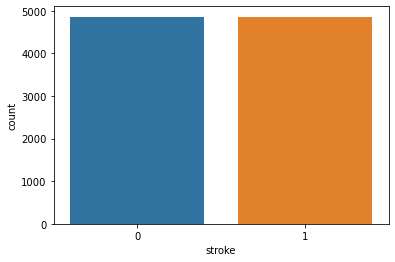

In [20]:
sns.countplot(x=df_upsampled['stroke'])

In [21]:
'''X = df.drop(columns='stroke')
y = df['stroke']'''
X = df_upsampled.drop(columns='stroke')
y = df_upsampled['stroke']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44, shuffle =True)

In [24]:
GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=12, learning_rate=0.35, random_state=150)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.9965706447187929


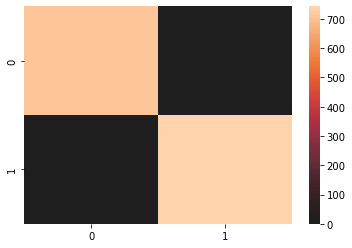

Confusion Matrix is
 [[710   5]
 [  0 743]]


In [25]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [26]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

y_pred = GBCModel.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       715
           1       0.99      1.00      1.00       743

    accuracy                           1.00      1458
   macro avg       1.00      1.00      1.00      1458
weighted avg       1.00      1.00      1.00      1458

0.9965706447187929


In [27]:
from joblib import Parallel, delayed
import joblib

joblib.dump(GBCModel, 'new_stroke_disease_model.pkl')

['new_stroke_disease_model.pkl']

In [28]:
# Load the model that you just saved
#GBCModel = joblib.load('new_stroke_disease_model.pkl')

# Saving the data columns from training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_stroke_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
